In [1]:
import importlib
import sys
import os
import nltk
import pandas as pd
import networkx as nx


# Add the 'src' directory to the system path
sys.path.append(os.path.abspath('../src'))
src_path = os.path.abspath('../src')

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Import classes from the modules using their correct filenames
from DataLoaderClass import DataLoader

In [3]:
# Initialize paths
BIB_FILE_PATH = '../examples/EX1_POWER_SYSTEM_FPGA_FREQUENCY_ESTIMATORS/index.bib'
PDF_FOLDER_PATH = '../examples/EX1_POWER_SYSTEM_FPGA_FREQUENCY_ESTIMATORS/files'

In [4]:
# Step 1: Data Loading and Processing
loader = DataLoader(BIB_FILE_PATH, PDF_FOLDER_PATH)
processed_data = loader.load_and_process()


Matching process completed.
Total references matched: 31 out of 31
Unmatched References: 0

Unmatched PDF Folders: 0


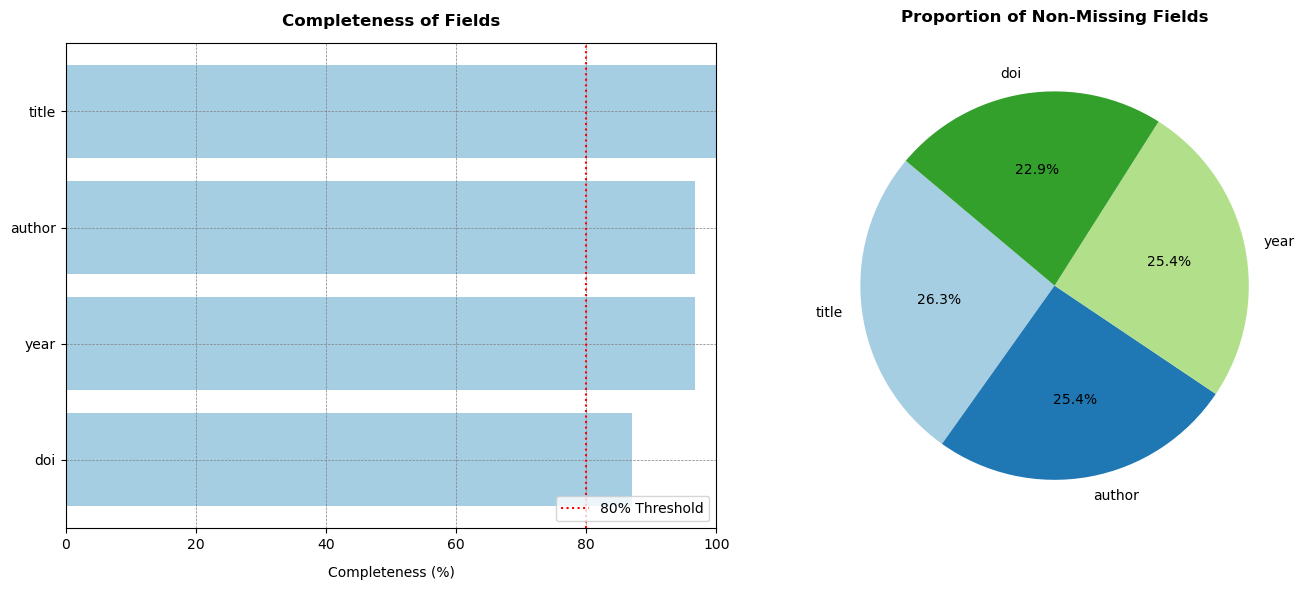

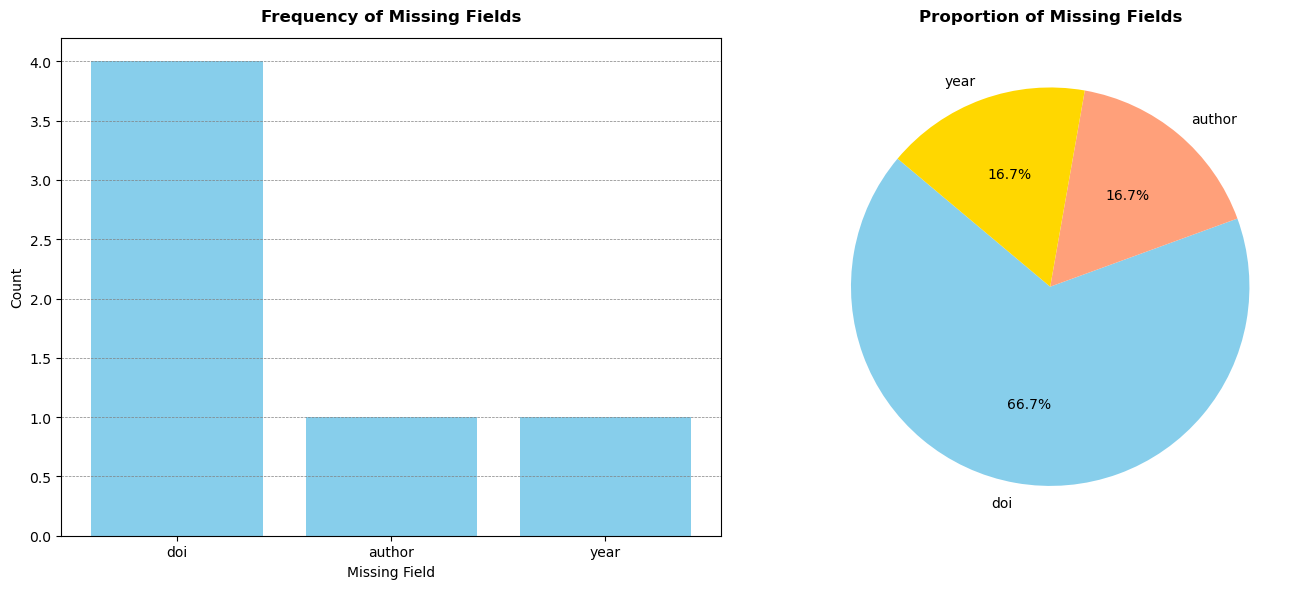

Completeness Metrics
 Field  Filled  Completeness (%)
 title      31        100.000000
author      30         96.774194
  year      30         96.774194
   doi      27         87.096774

Missing Fields Summary
 Record Missing Fields
      5  [author, doi]
      6          [doi]
      8          [doi]
     13    [year, doi]


In [5]:
# -------------------------------------------------------------- #
# -- EDA M0 :: Completness ------------------------------------- #
# -------------------------------------------------------------- #
from eda.m0_completness_analysis import CompletenessProcessor
from eda.m0_completness_analysis import CompletenessVisualizer
from eda.m0_completness_analysis import CompletenessReporter
# -------------------------------------------------------------- #

# Data
data = processed_data

# Process data
processor = CompletenessProcessor(data)
completeness_df = processor.calculate_completeness()
missing_fields_df = processor.identify_missing_fields()

# Visualize data
visualizer = CompletenessVisualizer()
visualizer.plot_completeness(completeness_df)
visualizer.plot_missing_fields(missing_fields_df)

# Report data
reporter = CompletenessReporter()
reporter.report_completeness(completeness_df)
reporter.report_missing_fields(missing_fields_df)

In [6]:
# -------------------------------------------------------------- #
# -- EDA M1 :: Words ------------------------------------------- #
# -------------------------------------------------------------- #
from eda.m1_words_analysis import Processor
from eda.m1_words_analysis import Visualizer
from eda.m1_words_analysis import Reporter
# -------------------------------------------------------------- #

# Data
data = processed_data

In [7]:
##############################################################################
### Function 1 => Words: Most Frequent Words (Wordcloud , Barplot & Table) ###
##############################################################################

### **Function 1 => Words: Most Frequent Words**

The most frequent words analysis identifies the most common terms in the `plain_text` field, providing insights into the dominant themes or topics within the dataset. This is achieved by calculating the absolute frequency of each word, after preprocessing the text to remove stopwords, non-alphabetic characters, and custom exclusions. The output includes a word cloud, a bar chart, and a table of the most frequent words.

#### **How to Interpret**
- **Word Cloud:** Visually highlights the most frequent words, where larger font sizes represent higher frequencies. This provides an intuitive overview of the key terms in the data.
- **Bar Chart:** Offers a detailed view of word frequencies, enabling precise comparisons between terms.
- **Table:** Lists the most frequent words and their counts, useful for further analysis or export.

This indicator helps uncover dominant terms in any textual dataset, whether in academic papers, social media, or legal documents. While high frequencies often suggest relevance, further context-specific analysis is recommended to fully understand their significance.

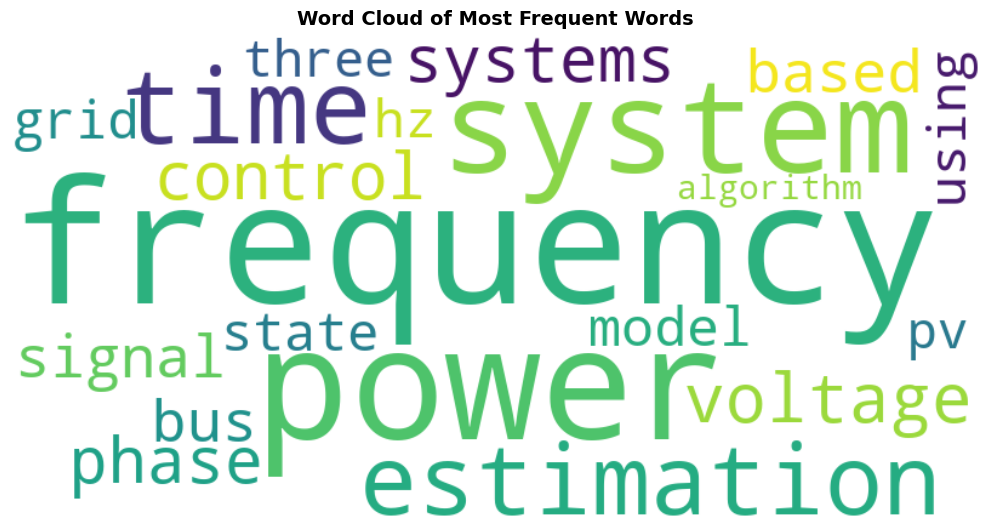

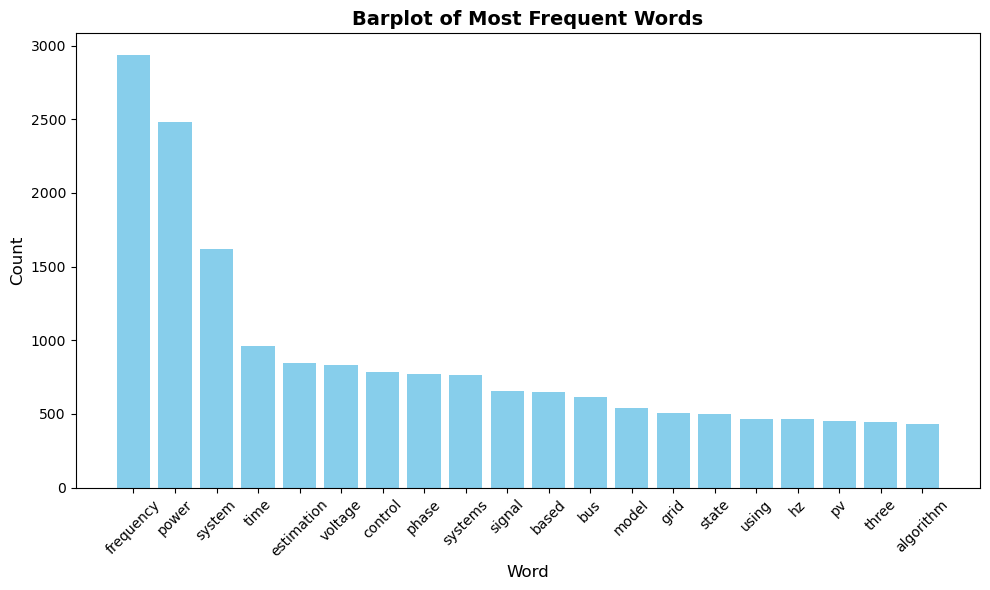

,Word,Count
0,frequency,2936
1,power,2479
2,system,1622
3,time,962
4,estimation,847
5,voltage,835
6,control,787
7,phase,768
8,systems,763
9,signal,656


In [8]:
### Function 1 => Words: Most Frequent Words (Wordcloud , Barplot & Table) ###

# Extract the most frequent words
n = 20  # Number of words to extract
most_frequent_words_df = Processor(data).get_most_frequent_words(n)

# Visualize the most frequent words
Visualizer.plot_wordcloud(
    word_freq=dict(zip(most_frequent_words_df['Word'], most_frequent_words_df['Count'])),
    title="Word Cloud of Most Frequent Words",
    filename="most_frequent_words"
)

Visualizer.plot_bar_chart(
    df=most_frequent_words_df,
    title="Barplot of Most Frequent Words",
    filename="most_frequent_words"
)

# Save the table of most frequent words
Reporter.save_to_csv(most_frequent_words_df, "most_frequent_words_report")

# Display the DataFrame as a table (optional for viewing in notebook)
most_frequent_words_df

In [9]:
#################################################################################
### Function 2 => Words: Most Frequent Keywords (Wordcloud , Barplot & Table) ###
#################################################################################

### **Indicator: Most Frequent Keywords**

The analysis of the most frequent keywords focuses on identifying key terms extracted from the `keywords`, `title`, and `description` fields in the dataset's metadata. These terms provide an overview of the main topics and themes discussed in the data. The keywords are ranked based on their frequency of occurrence after preprocessing to remove common stopwords, non-alphabetic characters, and custom exclusions.

#### **How to Interpret**
- **Word Cloud:** Displays the most frequent keywords, where the size of each keyword reflects its frequency. This visualization is useful for quickly identifying the dominant topics in the dataset.
- **Bar Chart:** Provides a detailed view of keyword frequencies, showing the ranking and counts of the top keywords in a clear, quantitative format.
- **Table:** Lists the keywords and their counts in descending order, facilitating detailed analysis and further processing.

This indicator is valuable for summarizing the dataset's focus, whether it's academic papers, social media posts, or other textual data. Users can expect to identify recurring topics or concepts, helping to guide further analysis or refine search criteria.


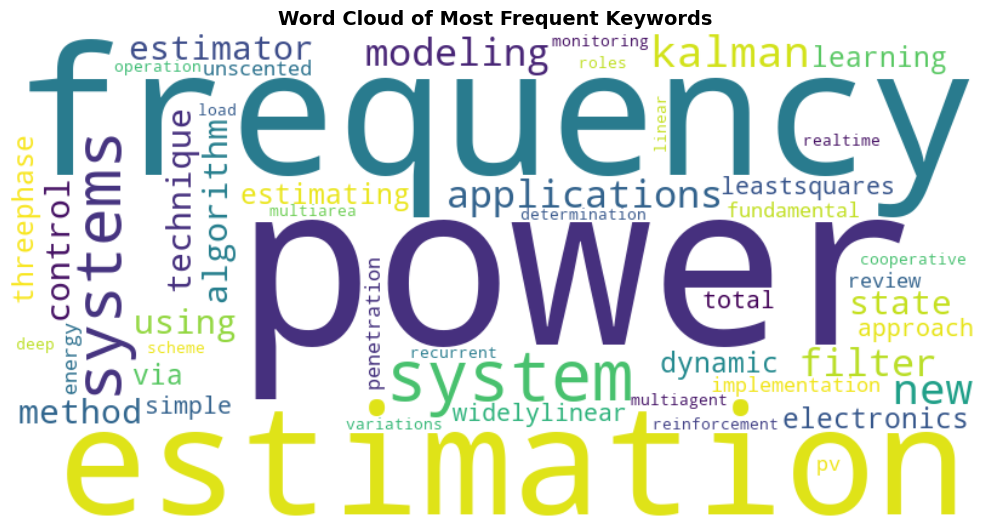

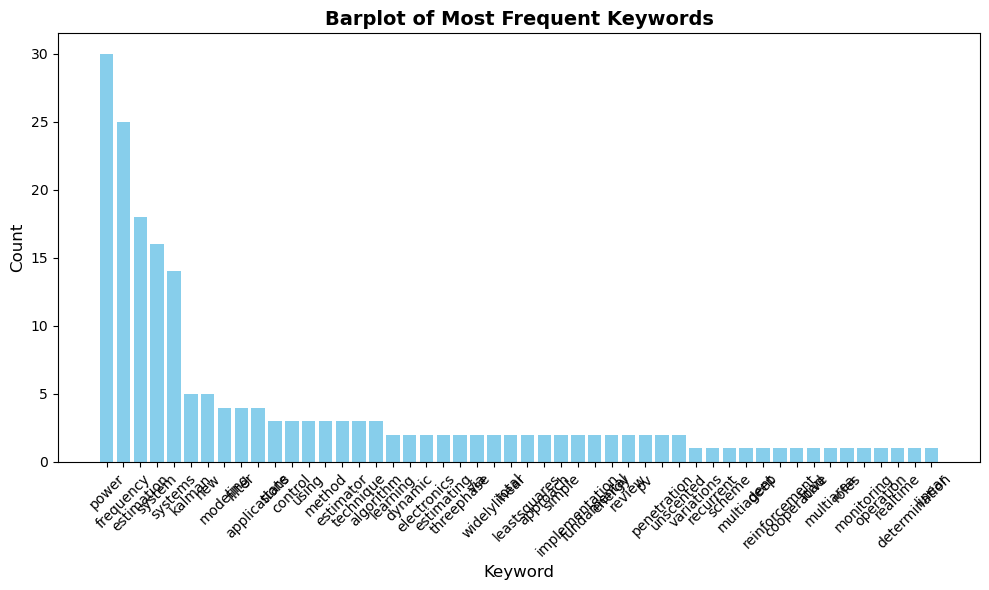

,Keyword,Count
0,power,30
1,frequency,25
2,estimation,18
3,system,16
4,systems,14
5,kalman,5
6,new,5
7,modeling,4
8,filter,4
9,applications,4


In [10]:

### Function 2 => Words: Most Frequent Keywords (Wordcloud , Barplot & Table) ###

# Step 1: Extract the most frequent keywords
n_keywords = 50  # Number of keywords to extract
most_frequent_keywords_df = Processor(data).get_top_keywords(n=n_keywords)

# Step 2: Visualize the most frequent keywords
Visualizer.plot_wordcloud(
    word_freq=dict(zip(most_frequent_keywords_df['Keyword'], most_frequent_keywords_df['Count'])),
    title="Word Cloud of Most Frequent Keywords",
    filename="most_frequent_keywords"
)

Visualizer.plot_bar_chart(
    df=most_frequent_keywords_df,
    title="Barplot of Most Frequent Keywords",
    filename="most_frequent_keywords",
    x_col="Keyword"  # Specify the correct column name for the x-axis
)

# Step 3: Save the table of most frequent keywords
Reporter.save_to_csv(most_frequent_keywords_df, "most_frequent_keywords_report")

# Step 4: Display the DataFrame as a table (optional for viewing in notebook)
most_frequent_keywords_df

In [11]:
########################################################################
### Function 3 => Words: Difference Between Keywords & Words (Table) ###
########################################################################

### **Indicator: Difference Between Keywords & Words**

This analysis identifies discrepancies between the most frequent keywords (from metadata fields like `keywords`, `title`, and `description`) and the most frequent words (from the plain text content). By comparing these two sets, users can highlight terms that are significant in metadata but may be underrepresented in the full text, or vice versa.

#### **How to Interpret**
- **Exclusive Keywords:** These are terms that appear frequently in the metadata but not in the plain text. They often represent broader topics or editorial keywords.
- **Exclusive Words:** These are terms that dominate the plain text but are absent in the metadata. They might indicate overlooked or implicit themes in the dataset.
- **Intersection:** Keywords and words that overlap signify alignment between the metadata and the full text.

This comparison helps users assess the coherence between textual content and descriptive metadata, which can guide adjustments to metadata or provide insights into thematic coverage.


In [12]:
### Function 3 => Words: Difference Between Keywords & Words (Table) ###

# Step 1: Extract most frequent keywords and words
n_keywords = 20
n_words = 20
processor = Processor(data)

most_frequent_keywords = set(processor.get_top_keywords(n=n_keywords)['Keyword'])
most_frequent_words = set(processor.get_most_frequent_words(n=n_words)['Word'])

# Step 2: Calculate differences
keywords_not_in_words = most_frequent_keywords - most_frequent_words
words_not_in_keywords = most_frequent_words - most_frequent_keywords
intersection = most_frequent_keywords & most_frequent_words

# Step 3: Create a summary table
differences_df = pd.DataFrame({
    "Keywords Only": list(keywords_not_in_words) + [""] * (len(words_not_in_keywords) - len(keywords_not_in_words)),
    "Words Only": list(words_not_in_keywords) + [""] * (len(keywords_not_in_words) - len(words_not_in_keywords)),
    "Intersection": list(intersection) + [""] * (max(len(keywords_not_in_words), len(words_not_in_keywords)) - len(intersection))
})

# Step 4: Save the table to CSV
Reporter.save_to_csv(differences_df, "keywords_vs_words_difference")

# Step 5: Display the table in the notebook
differences_df

,Keywords Only,Words Only,Intersection
0,modeling,time,estimation
1,kalman,signal,algorithm
2,learning,model,using
3,filter,voltage,control
4,estimator,grid,systems
5,new,phase,frequency
6,applications,bus,system
7,technique,three,power
8,dynamic,pv,state
9,method,hz,


In [13]:
################################################################################
### Function 4 => Words: Trending / Untrending Terms (Barplot & Table) #########
################################################################################

### **Indicator: Trending / Untrending Terms**

This indicator tracks the frequency of specific terms (keywords or words) over time, providing insights into their historical trends within the dataset. By analyzing the yearly occurrences of these terms, we can identify:
- **Trending Terms:** Words whose frequency increases significantly over time.
- **Untrending Terms:** Words that show a decline in frequency.

#### **How to Interpret**
- **Barplot:** Displays the yearly count of each term, making it easy to observe changes over time.
- **Table:** Lists the yearly frequency of each term, offering a detailed view for further analysis.

This analysis is useful for understanding shifts in topics of interest, such as emerging research areas, fading trends, or stable themes across years.


Tracking words: ['frequency', 'power', 'system', 'time', 'estimation', 'voltage', 'control', 'phase', 'systems', 'signal']


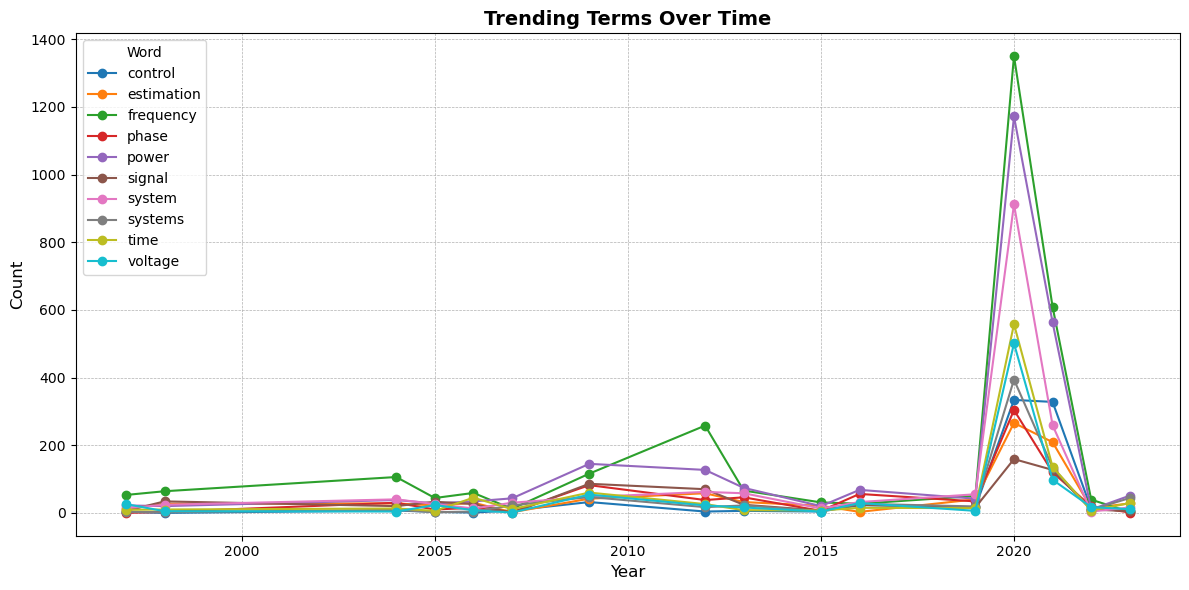

Grouped Trends (Pivot Table):


Word,control,estimation,frequency,phase,power,signal,system,systems,time,voltage
Year,,,,,,,,,,
1997,3,11,53,0,22,6,14,3,9,26
1998,0,27,64,3,20,34,24,2,10,5
2004,7,28,106,30,38,20,40,9,13,4
2005,3,22,44,10,28,33,26,2,6,23
2006,1,30,59,15,34,26,13,4,45,8
2007,7,2,12,2,43,0,30,22,11,1
2009,32,42,116,82,145,86,47,47,60,54
2012,4,58,258,38,127,70,62,17,26,22
2013,6,32,66,46,74,24,58,22,8,16


In [14]:
### Function 4 => Words: Trending / Untrending Terms (Barplot & Table) #########

# Step 1: Define the source for words to track
n = 10  # Number of terms to track
source = "most_frequent_words"  # Options: "most_frequent_words", "most_frequent_keywords", or "custom"
custom_words = []  # Custom list of words to track

# Step 2: Generate words_to_track based on the source
processor = Processor(data)

if source == "most_frequent_words":
    words_to_track = processor.get_most_frequent_words(n=n)["Word"].tolist()
elif source == "most_frequent_keywords":
    words_to_track = processor.get_top_keywords(n=n)["Keyword"].tolist()
elif source == "custom":
    words_to_track = custom_words
else:
    raise ValueError("Invalid source. Choose from 'most_frequent_words', 'most_frequent_keywords', or 'custom'.")

print(f"Tracking words: {words_to_track}")

# Step 3: Get trends of the specified words over time
trends_df = processor.get_word_trends(words_to_track)

# Step 4: Visualize the trends
Visualizer.plot_line_chart(
    df=trends_df,
    title="Trending Terms Over Time",
    filename="trending_terms_line",
    x_col="Year",  # Year on the x-axis
    y_col="Count",  # Frequency count on the y-axis
    hue_col="Word"  # Each term gets its own line
)

# Step 4: Save the trends to a CSV file
Reporter.save_to_csv(trends_df, "trending_terms_report")

# Step 5: Display the DataFrame as a table (optional for viewing in notebook)
pivot_trends_df = trends_df.pivot(index="Year", columns="Word", values="Count").fillna(0)
print("Grouped Trends (Pivot Table):")
pivot_trends_df

In [15]:
################################################################################
### Function 5 => Words: Co-Occurrence Table (Table, Network)  #################
################################################################################

### **Indicator: Co-Occurrence Table and Network**

This indicator identifies word pairs that frequently appear together within the text data, helping to uncover relationships between terms. It calculates a co-occurrence matrix where each cell represents the number of times two words appear together in the same context (e.g., a document).

#### **How to Interpret**
- **Co-Occurrence Table:** Lists the most common word pairs along with their frequencies.
- **Co-Occurrence Network:** Visualizes the relationships between words as a graph, where:
  - Nodes represent words.
  - Edges represent co-occurrences, with edge thickness proportional to frequency.

This analysis highlights how terms relate to each other, offering insights into term associations or underlying themes in the dataset.


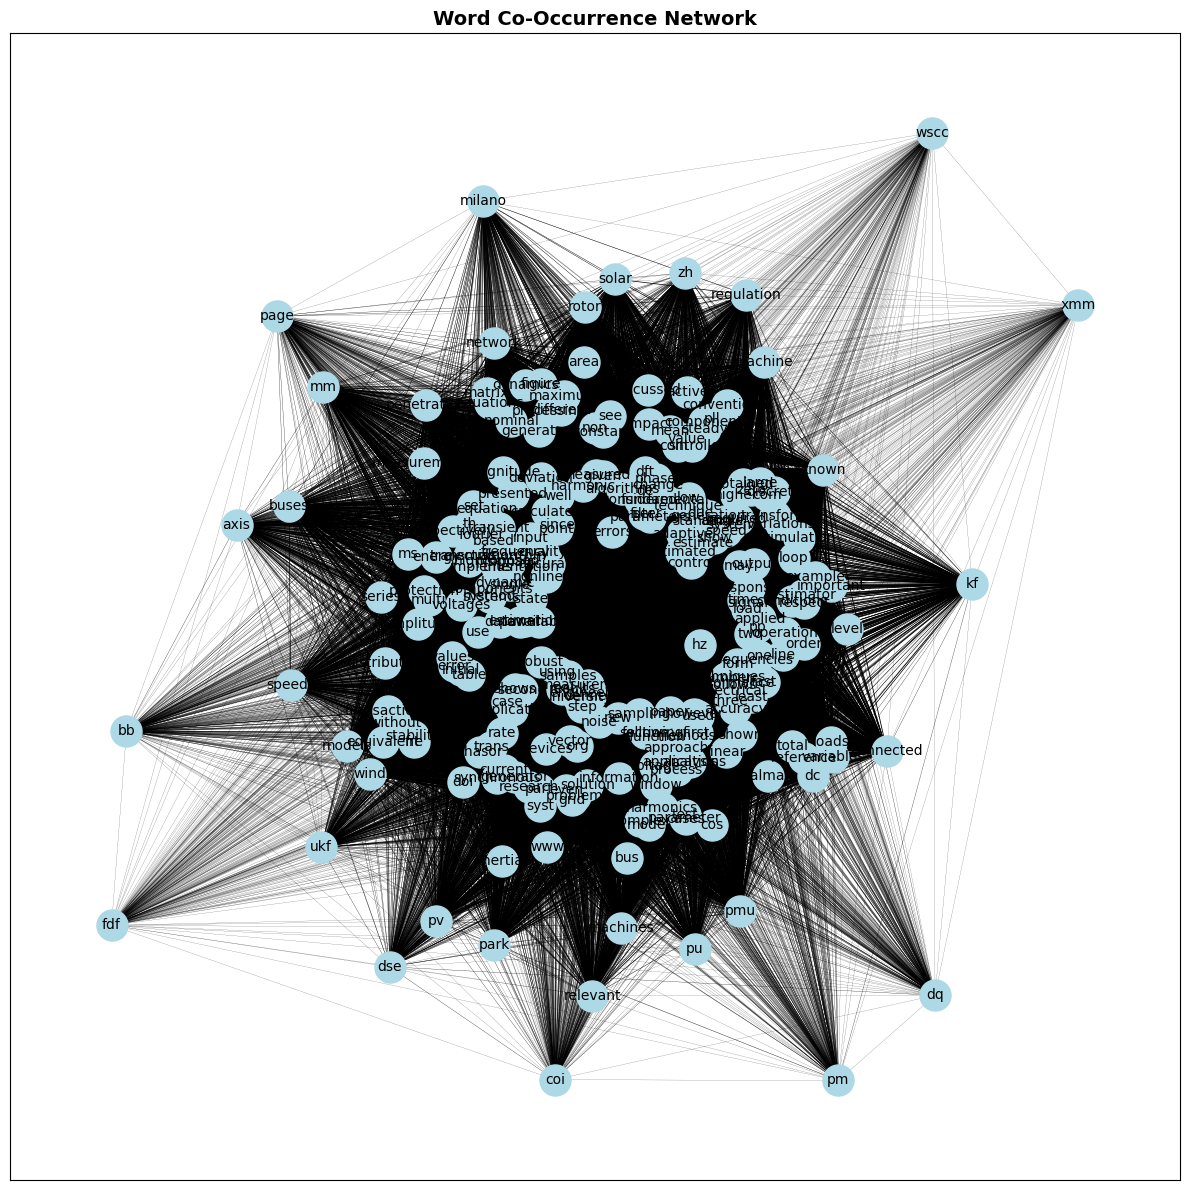

Co-Occurrence Table:


,Word1,Word2,Count
0,table,zero,14
1,parameter,zero,16
2,dse,zero,3
3,control,zero,21
4,operation,zero,17
...,...,...,...
31099,connected,ukf,1
31100,mm,syst,1
31101,pm,syst,1
31102,doi,kf,1


In [16]:
### Function 5 => Words: Co-Occurrence Table (Table, Network) ###

# Step 1: Define the top words for co-occurrence analysis
n_top_words = 250  # Number of top words to consider
processor = Processor(data)
top_words = processor.get_most_frequent_words(n=n_top_words)["Word"].tolist()

# Step 2: Generate the co-occurrence matrix
cooccurrence_df = processor.get_cooccurrence_matrix(top_words)

# Step 3: Save the co-occurrence table
Reporter.save_to_csv(cooccurrence_df, "cooccurrence_table")

# Step 4: Visualize the co-occurrence network
Visualizer.plot_cooccurrence_network(
    cooccurrence_df=cooccurrence_df,
    filename="cooccurrence_network"
)

# Step 5: Display the co-occurrence DataFrame
print("Co-Occurrence Table:")
cooccurrence_df


In [17]:
################################################
### Function 6 => Words: Comunities (Table)  ###
################################################

### **Indicator: Words: Communities**

This analysis identifies thematic communities of words within the co-occurrence network. A community is a group of words that are more densely connected to each other than to the rest of the network. These communities can represent specific themes or subtopics in the dataset.

#### **How to Interpret**
- **Community Table:** Each row represents a detected community, listing the words within it.
- Communities provide insights into related groups of terms that frequently co-occur, revealing underlying themes or clusters within the dataset.

This indicator helps in understanding the structure of word relationships in the dataset, allowing for a deeper exploration of topics and their associations.


In [18]:
### Function 6 => Words: Communities (Table)  ###

from networkx.algorithms.community import greedy_modularity_communities

# Step 1: Build the co-occurrence network
G = nx.Graph()
for _, row in cooccurrence_df.iterrows():
    G.add_edge(row['Word1'], row['Word2'], weight=row['Count'])

# Step 2: Detect communities using a modularity-based algorithm
communities = list(greedy_modularity_communities(G))

# Step 3: Prepare the communities table
communities_table = pd.DataFrame({
    "Community": [f"Community {i+1}" for i in range(len(communities))],
    "Words": [", ".join(sorted(community)) for community in communities]
})

# Step 4: Save the communities table
Reporter.save_to_csv(communities_table, "word_communities")

# Step 5: Display the table in the notebook
print("Detected Communities:")
communities_table

for i, community in enumerate(communities):
    print(f"Community {i+1}: {', '.join(sorted(community))}\n")

Detected Communities:
Community 1: ac, accuracy, accurate, active, adaptive, algorithm, algorithms, amplitude, analysis, angle, application, applications, applied, approach, area, available, axis, based, bb, bus, buses, calculated, case, cases, change, coi, com, complex, component, components, conditions, connected, considered, constant, control, controller, conventional, cos, current, data, dc, de, defined, deviation, devices, dft, different, discrete, discussed, distribution, doi, dq, dse, due, dynamic, dynamics, electric, electrical, energy, engineering, equation, equations, equivalent, error, errors, estimate, estimated, estimation, estimator, even, example, fast, fdf, figure, filter, first, following, follows, form, fourier, fre, frequencies, frequency, function, fundamental, generation, generator, generators, given, grid, harmonic, harmonics, high, higher, however, hz, impact, implementation, important, inertia, information, initial, input, kalman, kf, known, large, least, level,

In [19]:
################################################
### Function => Words: Summary (Table) ###
################################################

# Adjust pandas display options
pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.max_rows', None)      # Show all rows (if there are many)
pd.set_option('display.max_columns', None)   # Show all columns (if there are many)


# Step 1: Combine insights from previous functions
# 1. Top words (Function 1)
top_words = processor.get_most_frequent_words(n=10)
top_words_summary = ", ".join(top_words["Word"].tolist())

# 2. Top keywords (Function 2)
top_keywords = processor.get_top_keywords(n=10)
top_keywords_summary = ", ".join(top_keywords["Keyword"].tolist())

# 3. Trending terms (Function 4)
top_trending_terms = trends_df.groupby("Word")["Count"].sum().sort_values(ascending=False).head(10)
top_trending_summary = ", ".join(top_trending_terms.index.tolist())

# 4. Largest communities (Function 6)
largest_communities = communities_table.sort_values(by="Words", key=lambda x: x.str.len(), ascending=False).head(10)
largest_communities_summary = "; ".join(largest_communities["Words"].tolist())

# 5. Key co-occurrences (Function 5)
top_cooccurrences = cooccurrence_df.sort_values(by="Count", ascending=False).head(10)
top_cooccurrence_summary = ", ".join(f"{row['Word1']} & {row['Word2']} ({row['Count']})" for _, row in top_cooccurrences.iterrows())

# Step 2: Create the summary table
summary_data = {
    "Metric": [
        "Top Words",
        "Top Keywords",
        "Trending Terms",
        "Largest Communities",
        "Key Co-Occurrences"
    ],
    "Summary": [
        top_words_summary,
        top_keywords_summary,
        top_trending_summary,
        largest_communities_summary,
        top_cooccurrence_summary
    ]
}

summary_table = pd.DataFrame(summary_data)

# Step 3: Save the summary table
Reporter.save_to_csv(summary_table, "words_summary")

# Step 4: Display the summary table in the notebook
print("Words: Summary Table")
summary_table

Words: Summary Table


,Metric,Summary
0,Top Words,"frequency, power, system, time, estimation, voltage, control, phase, systems, signal"
1,Top Keywords,"power, frequency, estimation, system, systems, kalman, new, modeling, filter, applications"
2,Trending Terms,"frequency, power, system, time, estimation, voltage, control, phase, systems, signal"
3,Largest Communities,"ac, accuracy, accurate, active, adaptive, algorithm, algorithms, amplitude, analysis, angle, application, applications, applied, approach, area, available, axis, based, bb, bus, buses, calculated, case, cases, change, coi, com, complex, component, components, conditions, connected, considered, constant, control, controller, conventional, cos, current, data, dc, de, defined, deviation, devices, dft, different, discrete, discussed, distribution, doi, dq, dse, due, dynamic, dynamics, electric, electrical, energy, engineering, equation, equations, equivalent, error, errors, estimate, estimated, estimation, estimator, even, example, fast, fdf, figure, filter, first, following, follows, form, fourier, fre, frequencies, frequency, function, fundamental, generation, generator, generators, given, grid, harmonic, harmonics, high, higher, however, hz, impact, implementation, important, inertia, information, initial, input, kalman, kf, known, large, least, level, line, linear, load, loads, loop, low, machine, machines, magnitude, matrix, maximum, may, mean, measured, measurement, measurements, method, methods, milano, mm, model, models, ms, multi, network, new, noise, nominal, non, nonlinear, number, obtained, one, operation, order, org, output, page, paper, parameter, parameters, park, part, penetration, per, performance, phase, phasor, pll, pm, pmu, point, power, pp, presented, problem, process, processing, proposed, protection, pu, pv, quality, rate, real, reference, regulation, relevant, required, research, respect, respectively, response, results, robust, rotor, samples, sampling, second, section, see, series, set, show, shown, shows, signal, signals, simulation, sin, since, single, solar, solution, speed, speeds, stability, standard, state, steady, step, synchronous, syst, system, systems, table, technique, techniques, test, th, three, thus, time, total, trans, transactions, transform, transient, transmission, two, ukf, university, use, used, using, value, values, variables, variations, vector, voltage, voltages, well, wind, window, without, wscc, www, xmm, zero, zh"
4,Key Co-Occurrences,"results & system (31), estimation & power (31), proposed & time (31), estimation & methods (31), based & using (31), proposed & using (31), methods & proposed (31), proposed & results (31), methods & systems (31), estimation & time (31)"


In [20]:
# -------------------------------------------------------------- #
# -- EDA M2 :: Authors ----------------------------------------- #
# -------------------------------------------------------------- #
from eda.m2_authors_analysis import Processor
from eda.m2_authors_analysis import Visualizer
from eda.m2_authors_analysis import Reporter
# -------------------------------------------------------------- #

# Data
data = processed_data

# Process data
processor = Processor(data)
visualizer = Visualizer()
reporter = Reporter()

In [21]:
##########################################################
### Function 1 => Authors: Most Frequent Authors #########
##########################################################

### **Indicator: Top Authors**

The Top Authors indicator identifies the most prolific contributors in the dataset by calculating the total number of documents each author has contributed to, including individual and group contributions. This analysis highlights key contributors, with the results displayed in a bar chart for a visual ranking and a table summarizing their document counts. The data is also saved as a CSV file for further analysis.


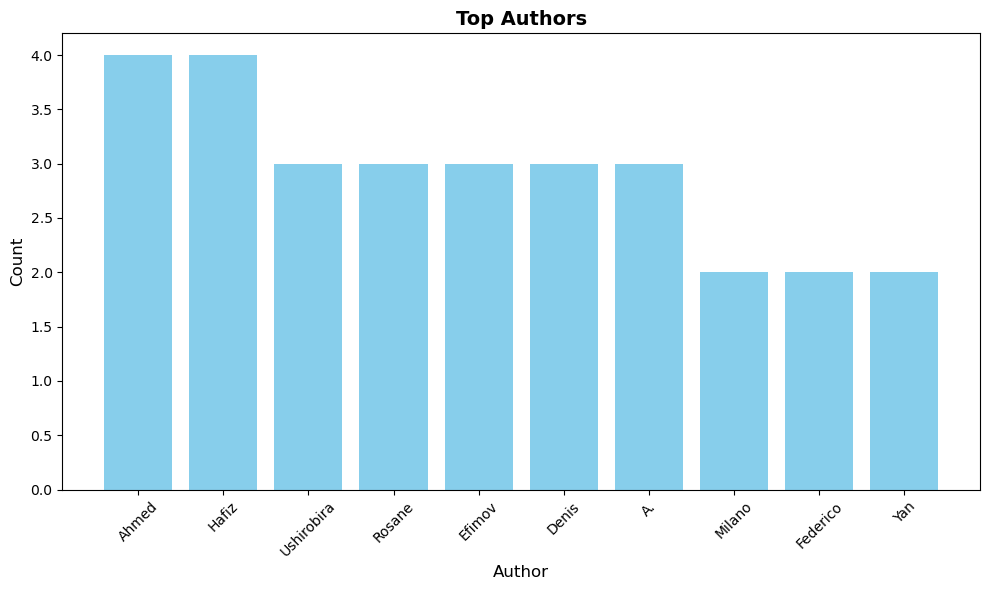

Saved to ../output/m2_authors/top_authors_report.csv
top_authors
       Author  Count
0       Ahmed      4
1       Hafiz      4
2  Ushirobira      3
3      Rosane      3
4      Efimov      3
5       Denis      3
6          A.      3
7      Milano      2
8    Federico      2
9         Yan      2


In [22]:
# Function 1: Authors: Most Frequent Authors
top_authors = processor.get_top_authors(n=10)

Visualizer.plot_bar_chart(top_authors, "Top Authors", "top_authors")

Reporter.save_to_csv(top_authors, "top_authors_report")

print('top_authors')
print(top_authors)

In [23]:
##########################################################
### Function 2 => Author Trends                  #########
##########################################################

### **Indicator: Author Trends**

The Author Trends indicator tracks the yearly publishing activity of top contributors, providing insights into their productivity over time. Each author's yearly document counts are visualized in a line chart to highlight growth, decline, or consistency in their contributions, with a detailed table and CSV file summarizing the trends for further exploration.


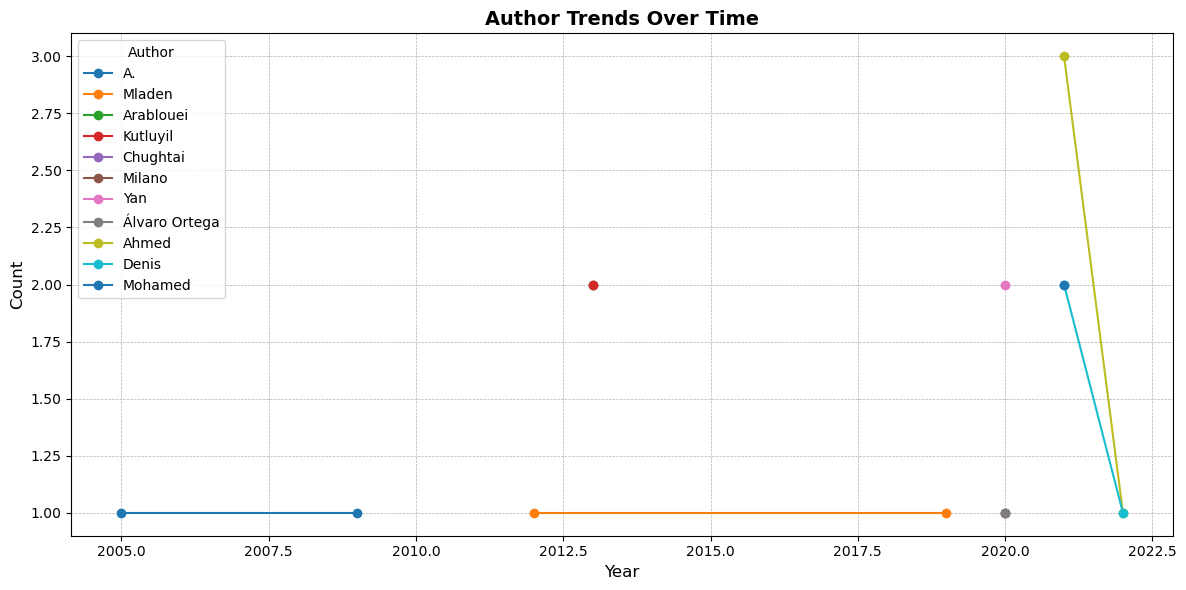

Saved to ../output/m2_authors/author_trends_report.csv


In [24]:
# Function 2: Author Trends
top_authors = processor.get_top_authors(n=25)
authors_to_track = top_authors["Author"].tolist()
author_trends = processor.get_author_trends(authors_to_track)
Visualizer.plot_line_chart(author_trends, "Author Trends Over Time", "author_trends")
Reporter.save_to_csv(author_trends, "author_trends_report")

In [25]:
#########################################################
### Function 3 => Authors: Most Collaborative Authors ###
#########################################################

### **Indicator: Most Collaborative Authors**

This metric identifies authors who frequently collaborate with others, emphasizing key contributors and network hubs in the dataset. Collaboration is measured by the number of unique co-authors each author has worked with, providing insights into their connectedness and influence within the research community.

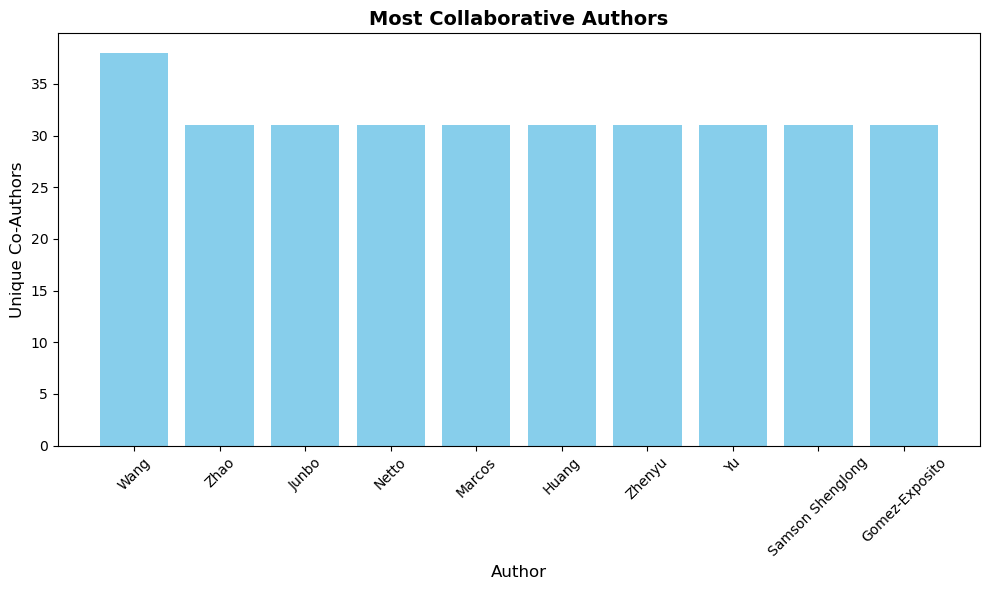

Saved to ../output/m2_authors/most_collaborative_authors_report.csv


,Author,Unique Co-Authors
0,Wang,38
1,Zhao,31
2,Junbo,31
3,Netto,31
4,Marcos,31
5,Huang,31
6,Zhenyu,31
7,Yu,31
8,Samson Shenglong,31
9,Gomez-Exposito,31


In [26]:
### Function 3 => Most Collaborative Authors (Table & Barplot)

collaborative_authors = processor.get_most_collaborative_authors(n=10)

Visualizer.plot_bar_chart(
    collaborative_authors,
    title="Most Collaborative Authors",
    filename="most_collaborative_authors",
    x_col="Author",  # Column for x-axis
    y_col="Unique Co-Authors"  # Corrected column for y-axis
)

# Step 4: Save the table
Reporter.save_to_csv(collaborative_authors, "most_collaborative_authors_report")

# Step 5: Display the table in the notebook
collaborative_authors

In [27]:
###########################################################
### Function 4 => Authors: Author Collaboration Network ###
###########################################################

### **Indicator: Author Collaboration Network**

This indicator visualizes the relationships between authors based on co-authorship. The graph shows how frequently authors collaborate, highlighting key connections and influential contributors within the dataset.

Saved to ../output/m2_authors/author_clusters.csv
Clusters saved to ../output/m2_authors/author_clusters.csv


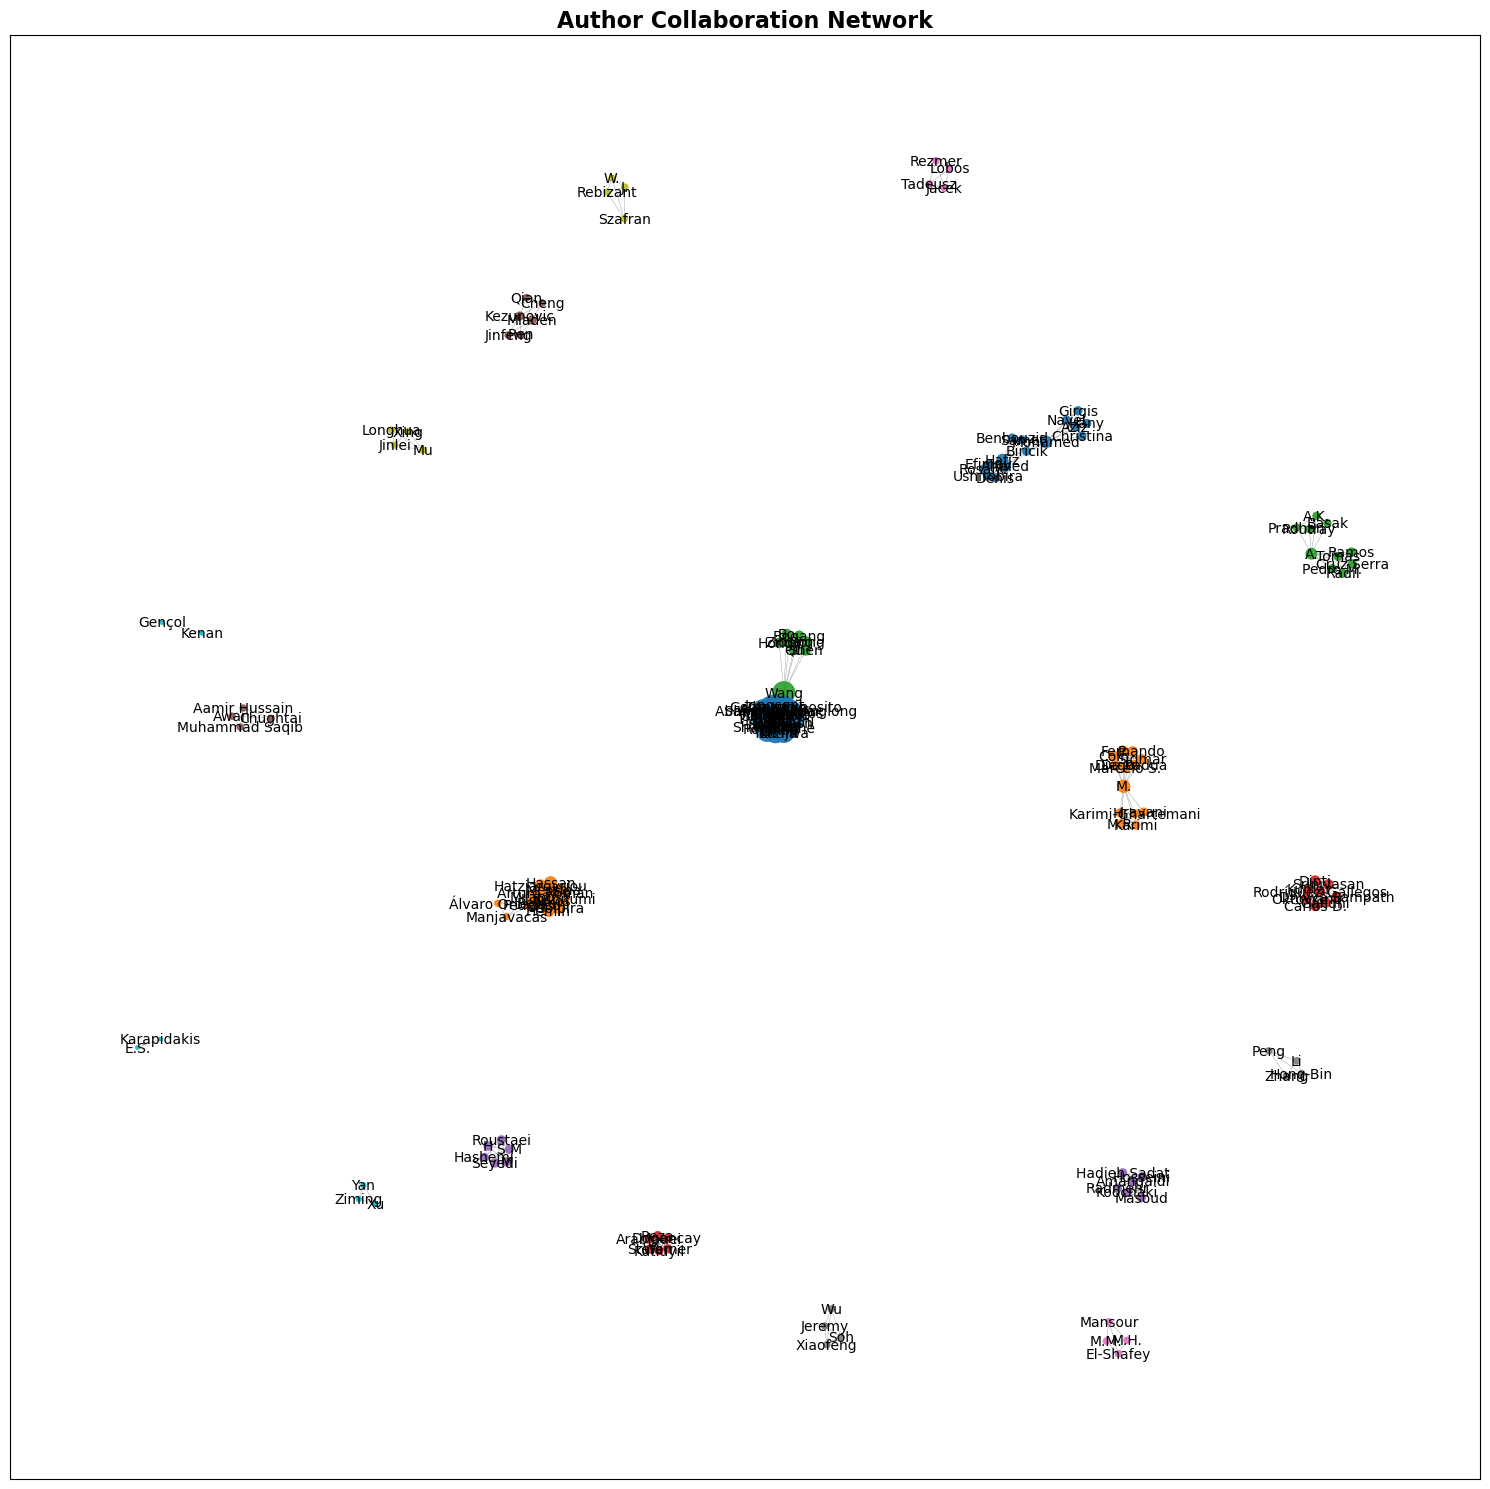

Saved to ../output/m2_authors/author_collaboration_network.csv
Saved to ../output/m2_authors/author_clusters.csv
Clusters saved to ../output/m2_authors/author_clusters.csv


,Cluster ID,Authors
0,Cluster 1,"A. P. Sakis, Abhinav Kumar, Abur, Akhlaghi, Ali, Alireza, Antonio, Bi, Bikash, Gomez-Exposito, Huang, Innocent, Junbo, Kamwa, Lamine, Marcos, Meliopoulos, Mili, Netto, Pal, Rouhani, Samson Shenglong, Shahrokh, Shaobu, Singh, Terzija, Tianshu, Vladimir, Yu, Zhao, Zhenyu"
1,Cluster 2,"Ahmed, Aziz, Benbouzid, Biricik, Christina, Denis, Efimov, Girgis, Hafiz, Hany, Mohamed, Nayel, Rosane, Samet, Ushirobira"
2,Cluster 3,"Arturo Román, Bevrani, Federico, Golpîra, Hassan, Hatziargyriou, Hêmin, Ise, Manjavacas, Messina, Milano, Nikos, Toshifumi, Álvaro Ortega"
3,Cluster 4,"Coln, De Padua, Diego, Fernando, H., Iravani, Karimi, Karimi-Ghartemani, M., M.R., Marcelo S., P., Sigmar"
4,Cluster 5,"A., A.K., Basak, Cruz Serra, Pedro M., Pradhan, Radil, Ramos, Routray, Tomas"
5,Cluster 6,"Bo, Bogang, Dong, Hongli, Qu, Shen, Wang, Zidong"
6,Cluster 7,"Carlos D., Dhivya Sampath, Dipti, Gandhi, Kumar, Oktoviano, Rodríguez-Gallegos, Srinivasan"
7,Cluster 8,"Arablouei, Dogancay, Kutluyil, Reza, Stefan, Werner"
8,Cluster 9,"Amangaldi, Hadieh Sadat, Hosseini, Koochaki, Masoud, Radmehr"
9,Cluster 10,"H, Hashemi, M, Roustaei, S M, Seyedi"


In [28]:
# Step 1: Generate the collaboration network data
collaboration_data = processor.create_collaboration_network()

# Step 2: Extract and display clusters
clusters_table = processor.extract_clusters(collaboration_data)

# Step 3: Plot the network
Visualizer.plot_author_collaboration_network(collaboration_data)

# Step 4: Save the collaboration table
Reporter.save_to_csv(collaboration_data, "author_collaboration_network")

# Extract and display clusters
clusters_table =processor.extract_clusters(collaboration_data)
clusters_table


In [29]:
###########################################################
### Function 5 => Authors: Productivity Distribution    ###
###########################################################

This indicator provides insights into how productivity is distributed among authors. It helps identify disparities, such as whether contributions are dominated by a few prolific authors or evenly distributed among many. The visualization includes a histogram and descriptive statistics to summarize the distribution.

#### **How to Interpret**
- **Histogram**: Shows the frequency distribution of document counts per author. A right-skewed distribution indicates a small group of prolific authors.
- **Descriptive Statistics**: Includes measures like mean, median, and standard deviation of document counts.


Saved to ../output/m2_authors/productivity_distribution_stats.csv


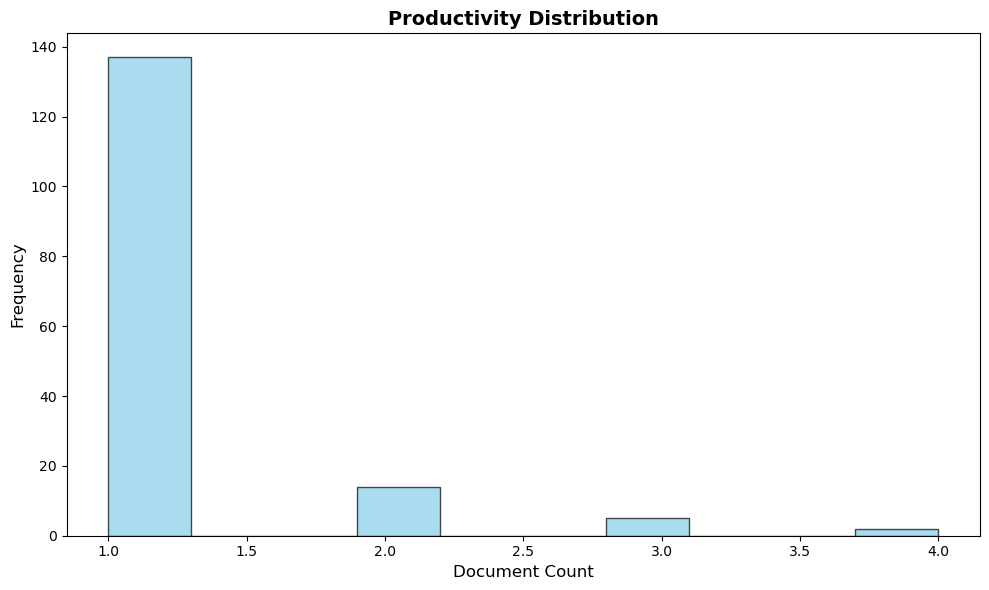

Saved to ../output/m2_authors/productivity_distribution_report.csv
Descriptive Statistics:
count    158.000000
mean       1.189873
std        0.543073
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: Document Count, dtype: float64


,Author,Document Count
0,Milano,2
1,Federico,2
2,Manjavacas,1
3,Álvaro Ortega,1
4,Chughtai,1
5,Aamir Hussain,1
6,Awan,1
7,Muhammad Saqib,1
8,Yan,2
9,Ziming,1


In [30]:
# Step 1: Get productivity distribution data
productivity_df = processor.get_productivity_distribution()

# Step 2: Save the descriptive statistics
descriptive_stats = productivity_df["Document Count"].describe()
Reporter.save_to_csv(descriptive_stats.to_frame(), "productivity_distribution_stats")

# Step 3: Visualize the histogram
Visualizer.plot_histogram(
    df=productivity_df,
    column="Document Count",
    title="Productivity Distribution",
    filename="productivity_distribution"
)

# Step 4: Save the table
Reporter.save_to_csv(productivity_df, "productivity_distribution_report")

# Display the descriptive statistics in the notebook
print("Descriptive Statistics:")
print(descriptive_stats)

# Display the DataFrame in the notebook
productivity_df


In [31]:
########################################################
### Function 6 => Authors: Longest-Standing Authors  ###
########################################################

### **Indicator: Longest-Standing Authors**

This indicator identifies the authors with the longest publication spans based on the dataset. It calculates the time difference between their first and last recorded publications, highlighting contributors with sustained activity over time.

#### **How to Interpret**
- **Bar Chart**: Displays the top authors ranked by their active publication spans.
- **Table**: Lists authors alongside their first publication year, last publication year, and active span (years).


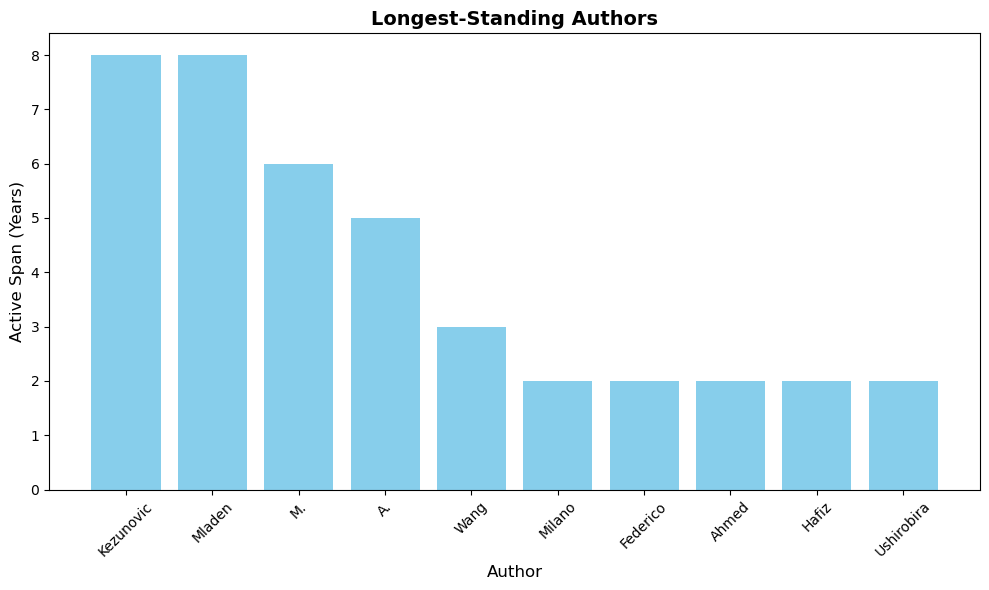

Saved to ../output/m2_authors/longest_standing_authors_report.csv


,Author,First Publication,Last Publication,Active Span (Years)
0,Kezunovic,2012,2019,8
1,Mladen,2012,2019,8
2,M.,2004,2009,6
3,A.,2005,2009,5
4,Wang,2021,2023,3
5,Milano,2020,2021,2
6,Federico,2020,2021,2
7,Ahmed,2021,2022,2
8,Hafiz,2021,2022,2
9,Ushirobira,2021,2022,2


In [32]:
# Step 1: Get the longest-standing authors
longest_standing_authors = processor.get_longest_standing_authors(n=10)

# Step 2: Visualize the longest-standing authors
Visualizer.plot_bar_chart(
    longest_standing_authors,
    title="Longest-Standing Authors",
    filename="longest_standing_authors",
    x_col="Author",  # Column for x-axis
    y_col="Active Span (Years)"  # Column for y-axis
)

# Step 4: Save the table
Reporter.save_to_csv(longest_standing_authors, "longest_standing_authors_report")

# Display the table in the notebook
longest_standing_authors

In [33]:
#####################################################################
### Function 7 => Authors: How Each Author Relates to Each Term   ###
#####################################################################

### **Indicator: Author-Term Relationships**

This indicator provides insights into how each author is related to specific terms. For each author, the relationships between terms (co-occurrences) are identified, highlighting their thematic focus. This analysis can uncover which terms are commonly used together by an author and how this differs from other authors.

#### **How to Interpret**
- **Table**: Displays the terms related to each author and the co-occurrences of these terms.
- **Insights**: For example, Author A may relate "frequency" to "power" and "control," while Author B relates "frequency" to "voltage" and "estimation."


In [ ]:
# Step 1: Get the author-term relationships
author_term_relationships = processor.get_author_term_relationships()

# Step 2: Save the table
Reporter.save_to_csv(author_term_relationships, "author_term_relationships")

# Step 3: Display the table in the notebook
author_term_relationships

In [ ]:
################################################################################################
### Function 6 => Authors: Como se relaciona cada autor con cada termino. (Para Author1, el termino Word1 se relacion con Word2,Word3. pero para Author2, el termino Word1 se relacion con Word5 ###
################################################################################################